**AML 5201 - Applied Probability and Statistics**

**Lab Internal Exam (40 points)**

**Friday, May 27, 2022, 2:30-4:00 PM**


---



Upload the following using the naming convention example "SudarsanAcharya_AIML_123456":

1.   The .ipynb file clearly showing the output cells;
2.   A PDF of the .ipynb file.

Click [here](https://tinyurl.com/yc84t5vj/) for upload link.

In [1]:
# Install and load packages
library(ggplot2)
library(dplyr)
install.packages('HSAUR')
library(HSAUR)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'D:/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'HSAUR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\killua\AppData\Local\Temp\RtmpKomq8s\downloaded_packages


Warning message:
"package 'HSAUR' was built under R version 4.1.3"
Loading required package: tools



In [2]:
# Load the heptathlon dataset
data(heptathlon)
str(heptathlon)

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


In [13]:
# Introduce a new column called sprint highlighting slow and fast sprinters
heptathlon = heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 129, 'fast', 'slow'))

# Change sprint column to factor type
heptathlon['sprint'] = lapply(heptathlon['sprint'], factor)

In [4]:
# Print the first few rows of the dataframe
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,slow
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast


**Question-1**: Make a scatter plot between *run200m* (x-axis) and *longjump* (y-axis). What do you observe from this plot?

**Answer :** - We can see a negative linear relation between run200m and longjump, as run200m increases longjump tends to decrease.

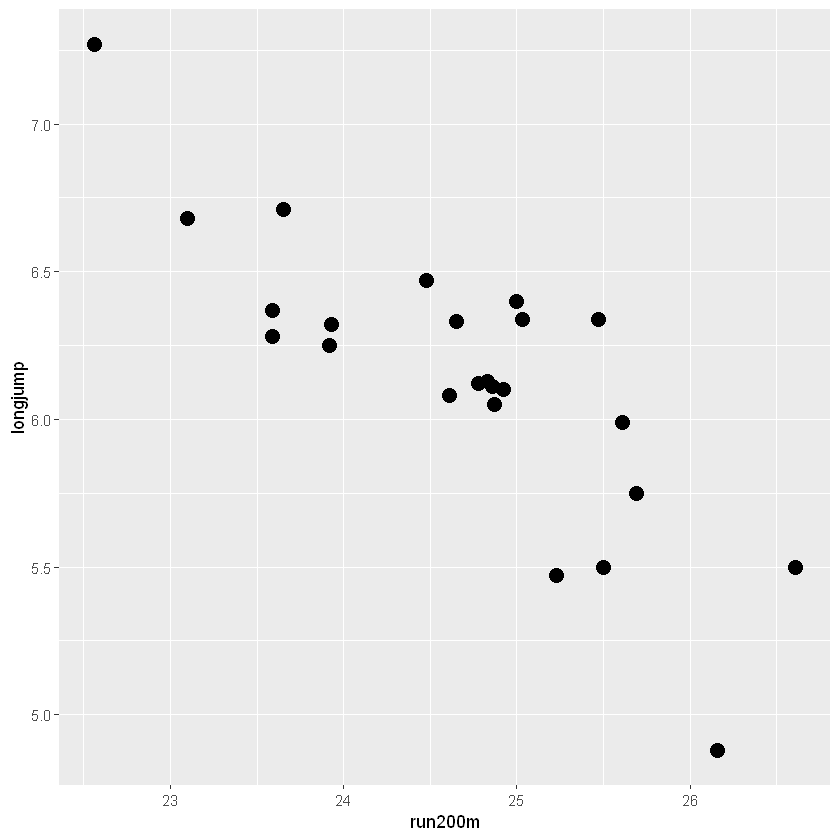

In [6]:
p1 = ggplot(data = heptathlon, aes(x = run200m, y = longjump)) +
  geom_point(size = 4) 
p1

**Question-2**: Make a scatter plot between *run200m* (x-axis) and *longjump* (y-axis) with the data points color-coded using *sprint*. What do you observe from this plot?

**Answer :** We can observe that runners who sprint fast in 200m race tend to be good at longjump when compared to runners who sprint slow.

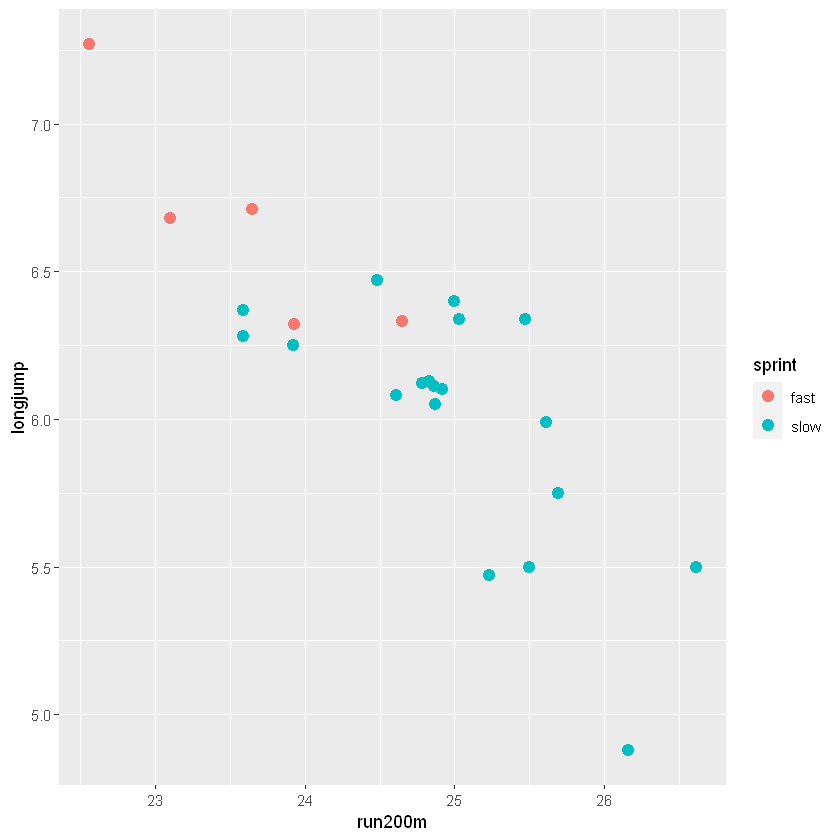

In [8]:
p2 = ggplot(data = heptathlon, aes(x = run200m, y = longjump, color = sprint)) +
  geom_point(size = 3) 
p2

**Question-3**: Calculate Pearson's correlation between *run200m* and *longjump*. What do you observe?

**Answer :** There is 81.17% for negative linear correlation between run200m and longjump.

In [9]:
cor(heptathlon$run200m, heptathlon$longjump, method = 'pearson')

[1] -0.8172053

**Question-4**: Select data frame without *sprint* and *score* columns.

In [10]:
hData = heptathlon %>% select(-c(sprint,score))
head(hData)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79


**Question 5**: From the output of the cell below, answer the following questions:

1. Which principal component assigns the greatest weight (in magnitude) to *run200m*? 
2. Which principal component assigns the greatest weight (in magnitude) to *longjump*? 
3. *True/false*: the 2nd principal component score for a sample assigns a maximum weight to *javelin*.
4. The 1st principal component assigns the least weight (in magnitude) to which feature?

**Answers :**

1. PC3 assigns the greatest weight to run200m. (Weight in magnitude 0.31)
2. PC3 assigns the greatest weight to longjump. (weight in magnitude 0.18)
3. True
4. PC1 assigns least weight to highjump.(weight in magnitude 0.0055)

In [11]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(cov(hData)) 

# Eigenvectors of the sample covariance matrix
u =e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

# Extract data matrix from data frame
X = as.matrix(hData)

# Print first sample
print(X[1, ]) 

# Print the first 3 eigenvectors or principal directions
print(u[, 1:3]) 

 hurdles highjump     shot  run200m longjump  javelin  run800m 
   12.69     1.86    15.80    22.56     7.27    45.66   128.51 
             [,1]          [,2]        [,3]
[1,]  0.069508692  0.0094891417  0.22180829
[2,] -0.005569781 -0.0005647147 -0.01451405
[3,] -0.077906090 -0.1359282330 -0.88374045
[4,]  0.072967545  0.1012004268  0.31005700
[5,] -0.040369299 -0.0148845034 -0.18494319
[6,]  0.006685584 -0.9852954510  0.16021268
[7,]  0.990994208 -0.0127652701 -0.11655815


**Question-6**: Explain the output of the cell below?

**Answer :** Samples projected onto first eigen vector.

In [14]:
print(X %*% u[, 1])

                        [,1]
Joyner-Kersee (USA) 128.6514
John (GDR)          126.3423
Behmer (GDR)        124.5962
Sablovskaite (URS)  132.5776
Choubenkova (URS)   128.3359
Schulz (GDR)        126.3804
Fleming (AUS)       132.9964
Greiner (USA)       134.0565
Lajbnerova (CZE)    136.4989
Bouraga (URS)       135.1834
Wijnsma (HOL)       132.0612
Dimitrova (BUL)     132.9867
Scheider (SWI)      135.6531
Braun (FRG)         143.3104
Ruotsalainen (FIN)  137.6684
Yuping (CHN)        147.0239
Hagger (GB)         139.0075
Brown (USA)         146.9512
Mulliner (GB)       138.6044
Hautenauve (BEL)    134.6055
Kytola (FIN)        134.1319
Geremias (BRA)      144.5973
Hui-Ing (TAI)       138.1891
Jeong-Mi (KOR)      140.0555
Launa (PNG)         164.1953


**Question-7**: Explain the output of the cell below?

**Answer :** : Variance of the projected sample in the direction of first eigen vector 

In [28]:
print(var(X %*% u[, 1])) 

         [,1]
[1,] 69.96725


**Question-8**: How many minimum principal components are needed to explain more than 90% of the variance in the data? In one line, explain how you could use the corresponding principal component scores (projected values) to get a final score for each athlete so that they can be ranked.

**Answer :** 

- Two Principle components PC1 and PC2 are needed to explain more than 90% of the variance in the data, PC1 and PC2 explain approximately 97% of the variance in the data.
- Using Principal Component Values

In [15]:
varPercent = (lambda/sum(lambda))*100
cumsum(varPercent)

[1]  82.06996  97.19562  99.44792  99.85032  99.97331  99.99870 100.00000

**Question 9**: how many levels does the categorical variable *sprint* have? What is the reference level? 

**Answer :**

- Sprint has two levels fast and slow.
- In this case fast is the reference level.

In [16]:
contrasts(heptathlon$sprint)

,slow
fast,0
slow,1


**Question 10**: fit a linear model for approximating *score* as a function of *shot* and *sprint*. Print the model's summary. How accurate is the model?

**Answer :**
- Just by looking at the R2 score we could say model captures 67% of linear relationship.
- But for  beta 1(sprintslow) p-value is greater than 10%, which make this feature insignificant.

In [17]:
model = lm(data = heptathlon, score ~ shot + sprint)
summary(model)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1124.58  -164.40    35.93   207.34   496.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3080.0      883.0   3.488 0.002084 ** 
shot           249.7       58.4   4.275 0.000308 ***
sprintslow    -330.4      213.4  -1.548 0.135842    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 338.5 on 22 degrees of freedom
Multiple R-squared:  0.6749,	Adjusted R-squared:  0.6454 
F-statistic: 22.84 on 2 and 22 DF,  p-value: 4.282e-06


**Question 11**: fit a linear model for approximating *score* as a function of *shot*, *javelin*, and *sprint*. Print the model's summary and answer the following questions:

1. Did the addition of the new predictor *javelin* imporve the model accuracy? 
2. *True/false* (explain in one line): the model suggests that there is a possible linear relationship between an athlete's score and javelin performance.
3. For a 1 metre increase in shot put throw and with the same javelin and sprint performance, we can say with 95% confidence that the athlete's score will increase/decrease by an amount in the interval [?, ?].
   
**Answer :**

1. No, it improved the model accuracy from 0.6749 to 0.676 which is not significant.
2. False, Since p-value is 0.79 the null hypothesis  stands. There is no linear relatonship between javelin and score.
3. [2 * stdError, - 2 * stdError] ->[2 * 59.669, -2 * 59.669] ->[2*59.669, -2*59.669]

In [18]:
model = lm(data = heptathlon, score ~ shot + javelin +sprint)
summary(model)


Call:
lm(formula = score ~ shot + javelin + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1090.63  -173.25    12.63   203.29   537.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3349.127   1347.536   2.485  0.02144 *  
shot         249.548     59.669   4.182  0.00042 ***
javelin       -5.996     22.297  -0.269  0.79061    
sprintslow  -354.060    235.151  -1.506  0.14705    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 345.9 on 21 degrees of freedom
Multiple R-squared:  0.676,	Adjusted R-squared:  0.6298 
F-statistic: 14.61 on 3 and 21 DF,  p-value: 2.301e-05


**Question 12**: fit a linear model for approximating *score* as a function of *highjump*, and *sprint*. Print the model's summary and answer the following questions:
1. How accurate is this model?
2. Considering a p-value of 10% as cutoff, are there any insignificant features?

**Answer :** 
- This is a pretty good model with an r2Score of 83.41%. This model captures 83.41% of linear relationship.
- There are none.

In [24]:
model = lm(data = heptathlon, score ~ highjump +sprint)
summary(model)


Call:
lm(formula = score ~ highjump + sprint, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.12 -162.88  -29.12  146.92  502.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2030.8     1175.5  -1.728   0.0981 .  
highjump      4873.2      646.0   7.544 1.54e-07 ***
sprintslow    -703.3      123.3  -5.702 9.81e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 241.9 on 22 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.819 
F-statistic: 55.29 on 2 and 22 DF,  p-value: 2.625e-09


**Question 13**: Using the model built above, extract the slope and intercept for estimating the *score* of *slow* and *fast* athletes. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)},$ and then write two separate equations for *slow* and *fast* athletes.

In [27]:
coef(model)
coef(model)[3]
coef(model)[1]

(Intercept)    highjump  sprintslow 
 -2030.8279   4873.1942   -703.2552

sprintslow 
 -703.2552

(Intercept) 
  -2030.828

In [ ]:
intercept_slow = coef(model)[1]
#intercept_fast = ? + ? reference variable isn't considered. 

slope_slow = coef(model)[3]
slope_highjump = coef(model)[2]
# slope_fast reference variable is not considered in a regression model

y = intercept_slow + (highjump * slope_highjump) + (slopeslow * slope_slow)

**Question 14**: fit a linear model for approximating *score* as a function of *shot*, *highjump*, and *sprint*. Print the model's summary and answer the following questions:
1. How accurate is this model?
2. Considering a p-value of 10% as cutoff, are there any insignificant features?

**Anwers :** 

1. This is by far the most accurate model with an r2Score of 90.89% and this has no insignificant features.
2. There are none.

In [21]:
model = lm(data = heptathlon, score ~ shot + highjump +sprint)
summary(model)


Call:
lm(formula = score ~ shot + highjump + sprint, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.03 -103.72  -37.17  126.92  363.95 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2508.72     898.90  -2.791  0.01095 *  
shot          144.30      34.74   4.153  0.00045 ***
highjump     3950.55     537.93   7.344 3.16e-07 ***
sprintslow   -416.72     116.22  -3.586  0.00174 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 183.4 on 21 degrees of freedom
Multiple R-squared:  0.9089,	Adjusted R-squared:  0.8959 
F-statistic: 69.84 on 3 and 21 DF,  p-value: 4.306e-11


**Question 15**: Complete the code below to build a linear model for approximating *score* as a function of *shot*, *highjump*, and *sprint* using the training data. Predict the model performance by applying it to the test data.

In [49]:
# Split the data into 80% train and 20% test parts
set.seed(0)
train_ind = sample(seq_len(nrow(hData)), size = floor(0.8 * nrow(hData)))

hDataTrain = heptathlon[train_ind, ]
hDataTest = heptathlon[-train_ind, ]

# Build linear regression model
model = lm(data = hDataTrain, score ~ shot + highjump + sprint)

# Predict on the test data
prediction = predict(model, hDataTest)

print(prediction)

# Print the true scores for the test data
print('Mean Squared Error')
mean((prediction-hDataTest$score)^2)

print('Mean Absolute Error')
mean(abs(prediction-hDataTest$score))

print('Root Mean Square Error')
mean(sqrt(mean((prediction-hDataTest$score)^2)))

[1] "Mean Squared Error"


[1] 8112.406

[1] "Mean Absolute Error"


[1] 84.81898

[1] "Root Mean Square Error"


[1] 90.06889